dataset2/df_ml_12.pkl
<Train>
corr
{'준내구재_r_Net': '비내구재_r_Net', '비내구재_r_Net': '준내구재_r_Net', '전문스포츠/레저_r_Abs': '전문스포츠/레저_구매금액_r_Abs', '전문스포츠/레저_구매금액_r_Abs': '전문스포츠/레저_r_Abs', '패션잡화_구매금액_r_Net': '패션잡화_r_Net', '패션잡화_r_Net': '패션잡화_구매금액_r_Net', '의류_구매금액_r_Net': '의류_r_Net', '의류_r_Net': '의류_구매금액_r_Net', '가구/인테리어_r_Net': '가구/인테리어_구매금액_r_Net', '가구/인테리어_구매금액_r_Net': '가구/인테리어_r_Net', '전문스포츠/레저_구매금액_r_Net': '전문스포츠/레저_r_Net', '전문스포츠/레저_r_Net': '전문스포츠/레저_구매금액_r_Net', '비내구재_r_Abs': '준내구재_r_Abs', '준내구재_r_Abs': '비내구재_r_Abs', '명품_구매금액_r_Abs': '명품_r_Abs', '사치품_r_Abs': '명품_r_Abs', '교육/문화용품_구매금액_r_Abs': '교육/문화용품_r_Abs', '교육/문화용품_r_Abs': '교육/문화용품_구매금액_r_Abs', '사치품_r_Net': '명품_r_Net', '명품_구매금액_r_Net': '명품_r_Net', '명품_r_Abs': '명품_구매금액_r_Abs', '교육/문화용품_구매금액_r_Net': '교육/문화용품_r_Net', '교육/문화용품_r_Net': '교육/문화용품_구매금액_r_Net', '기타_구매금액_r_Abs': '기타_r_Abs', '기타_r_Abs': '기타_구매금액_r_Abs', '명품_r_Net': '명품_구매금액_r_Net', '기타_r_Net': '기타_구매금액_r_Net', '기타_구매금액_r_Net': '기타_r_Net', '디지털/가전_r_Abs': '디지털/가전_구매금액_r_Abs', '디지털/가전_구매금

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.54s/it]
C:\anaconda3\envs\cakd3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:55:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[model] LogisticRegression() 

[confusion_matrix]         pred:0  pred:1
true:0    1335     630
true:1     546    1306 

[accuracy]: 0.6919
[precision]: 0.6919
[recall]: 0.7052
[f1_score]: 0.6895
[roc_auc]: 0.7634
----------------------------------------------------------------------
[model] SVC(probability=True) 

[confusion_matrix]         pred:0  pred:1
true:0    1307     658
true:1     518    1334 

[accuracy]: 0.6919
[precision]: 0.6919
[recall]: 0.7203
[f1_score]: 0.6941
[roc_auc]: 0.7634
----------------------------------------------------------------------
[model] DecisionTreeClassifier() 

[confusion_matrix]         pred:0  pred:1
true:0    1190     775
true:1     775    1077 

[accuracy]: 0.5939
[precision]: 0.5939
[recall]: 0.5

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:32<00:00,  8.10s/it]



[model] LogisticRegression() 

[confusion_matrix]         pred:0  pred:1
true:0    7578    1583
true:1    4385    5539 

[accuracy]: 0.6873
[precision]: 0.6873
[recall]: 0.5581
[f1_score]: 0.6499
[roc_auc]: 0.7878
----------------------------------------------------------------------
[model] SVC(probability=True) 

[confusion_matrix]         pred:0  pred:1
true:0    7003    2158
true:1    3496    6428 

[accuracy]: 0.7037
[precision]: 0.7037
[recall]: 0.6477
[f1_score]: 0.6945
[roc_auc]: 0.7823
----------------------------------------------------------------------
[model] DecisionTreeClassifier() 

[confusion_matrix]         pred:0  pred:1
true:0    6101    3060
true:1    4491    5433 

[accuracy]: 0.6043
[precision]: 0.6043
[recall]: 0.5475
[f1_score]: 0.5900
[roc_auc]: 0.6067
----------------------------------------------------------------------
[model] RandomForestClassifier() 

[confusion_matrix]         pred:0  pred:1
true:0    7267    1894
true:1    3799    6125 

[accuracy]: 0.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

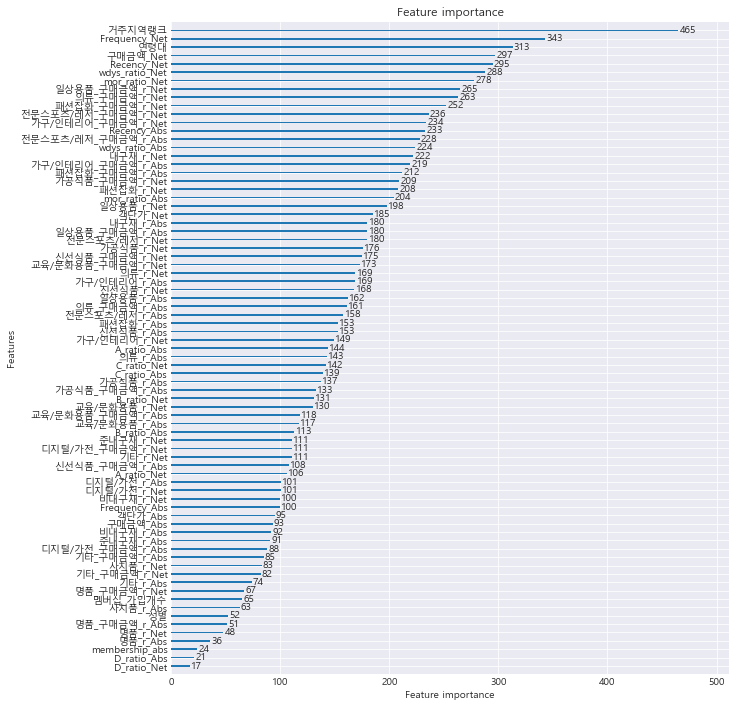

In [20]:
# from pickle_mixin import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
plt.style.use('seaborn-dark')
rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False #

# 거주지 바꿈
train_path = 'dataset2/df_ml_12.pkl'
test_path = 'dataset2/df_ml_123.pkl'

print(train_path)
with open(f'{train_path}', 'rb') as train_read:
   train = pd.read_pickle(train_read)

## Train


print('<Train>')

def get_corr(train, upper_condition_n, most_up_condition_n): 
      cr = train.corr()
      cr_p = cr.unstack()
      cr_v = cr_p.sort_values()
      cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
      A = print(dict(cond))
      return A  

print('corr')
get_corr(train,0.69,1)

print()


from sklearn.model_selection import train_test_split
X = train.drop(['target','고객번호'],axis=1)
y = train['target']


X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

lr = LogisticRegression()
svm = SVC(probability=True)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


from tqdm import tqdm
models = [lr,svm,dt,rf]
for model in tqdm(models):
    model.fit(X_train,y_train)

def varName(p):
    for k, v in globals().items():
        if id(p) == id(v):
            return k

for model in tqdm(models):
    globals()[f'{varName(model)}_pred'] = model.predict(X_test)


for model in tqdm(models):
    globals()[f'{varName(model)}_proba'] = model.predict_proba(X_test)[:,1]

def get_eval(name,y_test,prediction,proba):
    Label = np.unique([y_test, prediction])
    confusion= pd.DataFrame(confusion_matrix(y_test, prediction, labels=Label), 
                            index=['true:{:}'.format(x) for x in Label], 
                            columns=['pred:{:}'.format(x) for x in Label])
    accuracy = accuracy_score(y_test,prediction)
    precision = precision_score(y_test,prediction)
    recall = recall_score(y_test,prediction)
    f1 = f1_score(y_test,prediction)
    roc_auc = roc_auc_score(y_test,proba)
    print('[model]', name,'\n')
    print('[confusion_matrix]', confusion,'\n')
    print('[accuracy]: {:.4f}'.format(accuracy))
    print('[precision]: {:.4f}'.format(accuracy))
    print('[recall]: {:.4f}'.format(recall))
    print('[f1_score]: {:.4f}'.format(f1))
    print('[roc_auc]: {:.4f}'.format(roc_auc))
    print('-------'*10)

predicts = [lr_pred,svm_pred,dt_pred,rf_pred]
probas= [lr_proba, svm_proba, dt_proba, rf_proba]


from xgboost import XGBClassifier

evals = [(X_test,y_test)]
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1,max_depth =3)
xgb.fit(X_train,y_train)
xgb_preds = xgb.predict(X_test)
xgb_preds_proba = xgb.predict_proba(X_test)[:,1]

from lightgbm import LGBMClassifier
lgbm =LGBMClassifier(n_estimators=400)
evals= [(X_test,y_test)]
lgbm.fit(X_train, y_train)
lgbm_preds = lgbm.predict(X_test)
lgbm_preds_proba = lgbm.predict_proba(X_test)[:,1]


for name,predict, proba in zip(models, predicts , probas):
  get_eval(name,y_test,predict,proba)


get_eval(xgb,y_test,xgb_preds,xgb_preds_proba)
get_eval(lgbm,y_test,lgbm_preds,lgbm_preds_proba)


print()


print(test_path)

# TEST
print('<TEST>')


with open(f'{test_path}', 'rb') as test_read:
      test = pd.read_pickle(test_read)

print('corr')
get_corr(test,0.69,1)
print()


검증 = test.drop(['target','고객번호'],axis=1)
정확도검증 = test['target']

models = [lr,svm,dt,rf]
def varName(p):
    for k, v in globals().items():
        if id(p) == id(v):
            return k

for model in tqdm(models):
    globals()[f'{varName(model)}_pred'] = model.predict(검증)

for model in tqdm(models):
    globals()[f'{varName(model)}_proba'] = model.predict_proba(검증)[:,1]

xgb_preds = xgb.predict(검증)
xgb_preds_proba = xgb.predict_proba(검증)[:,1]

lgbm_preds = lgbm.predict(검증)
lgbm_preds_proba = lgbm.predict_proba(검증)[:,1]

print()
predicts = [lr_pred,svm_pred,dt_pred,rf_pred]
probas= [lr_proba, svm_proba, dt_proba, rf_proba]

for name,predict,proba in zip(models, predicts,probas):
      get_eval(name,정확도검증,predict,proba)

get_eval(xgb,정확도검증,xgb_preds,xgb_preds_proba)
get_eval(lgbm,정확도검증,lgbm_preds,lgbm_preds_proba)

print()
print('lgbm Feature importance')
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm,ax=ax)


<AxesSubplot:>

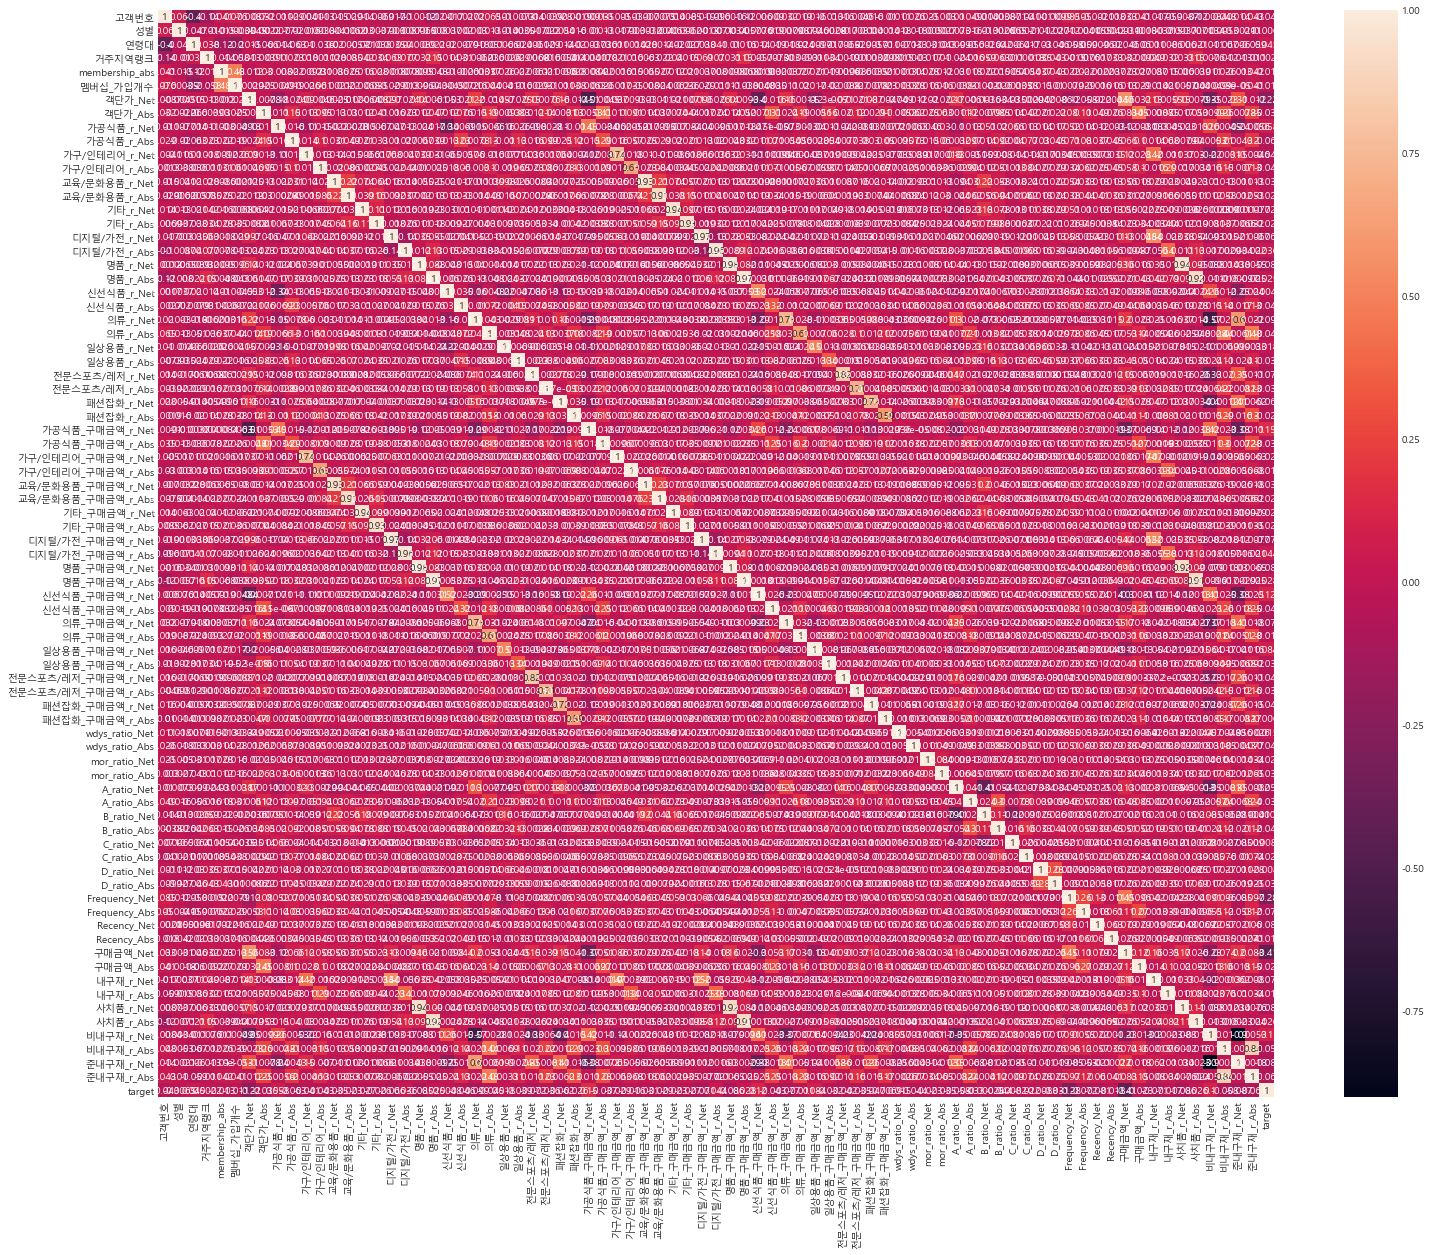

In [23]:
import seaborn as sns

data = pd.read_pickle('dataset2/df_ml_12.pkl')

plt.figure(figsize=(25,20))

sns.heatmap(data.corr(), annot=True)

In [32]:
corrdata = data.corr()>0.7

corrdata

,고객번호,성별,연령대,거주지역랭크,membership_abs,멤버십_가입개수,객단가_Net,객단가_Abs,가공식품_r_Net,가공식품_r_Abs,...,구매금액_Abs,내구재_r_Net,내구재_r_Abs,사치품_r_Net,사치품_r_Abs,비내구재_r_Net,비내구재_r_Abs,준내구재_r_Net,준내구재_r_Abs,target
고객번호,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
성별,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
연령대,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
거주지역랭크,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
membership_abs,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
비내구재_r_Net,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
비내구재_r_Abs,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
준내구재_r_Net,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
준내구재_r_Abs,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [36]:

cr = data.corr()
cr_p = cr.unstack()
cr_v = cr_p.sort_values()
cond = cr_v[(0.69<abs(cr_v)) & (1 > abs(cr_v))].keys()
A = print(dict(cond))
A

{'준내구재_r_Net': '비내구재_r_Net', '비내구재_r_Net': '준내구재_r_Net', '전문스포츠/레저_r_Abs': '전문스포츠/레저_구매금액_r_Abs', '전문스포츠/레저_구매금액_r_Abs': '전문스포츠/레저_r_Abs', '패션잡화_구매금액_r_Net': '패션잡화_r_Net', '패션잡화_r_Net': '패션잡화_구매금액_r_Net', '의류_구매금액_r_Net': '의류_r_Net', '의류_r_Net': '의류_구매금액_r_Net', '가구/인테리어_r_Net': '가구/인테리어_구매금액_r_Net', '가구/인테리어_구매금액_r_Net': '가구/인테리어_r_Net', '전문스포츠/레저_구매금액_r_Net': '전문스포츠/레저_r_Net', '전문스포츠/레저_r_Net': '전문스포츠/레저_구매금액_r_Net', '비내구재_r_Abs': '준내구재_r_Abs', '준내구재_r_Abs': '비내구재_r_Abs', '명품_구매금액_r_Abs': '명품_r_Abs', '사치품_r_Abs': '명품_r_Abs', '교육/문화용품_구매금액_r_Abs': '교육/문화용품_r_Abs', '교육/문화용품_r_Abs': '교육/문화용품_구매금액_r_Abs', '사치품_r_Net': '명품_r_Net', '명품_구매금액_r_Net': '명품_r_Net', '명품_r_Abs': '명품_구매금액_r_Abs', '교육/문화용품_구매금액_r_Net': '교육/문화용품_r_Net', '교육/문화용품_r_Net': '교육/문화용품_구매금액_r_Net', '기타_구매금액_r_Abs': '기타_r_Abs', '기타_r_Abs': '기타_구매금액_r_Abs', '명품_r_Net': '명품_구매금액_r_Net', '기타_r_Net': '기타_구매금액_r_Net', '기타_구매금액_r_Net': '기타_r_Net', '디지털/가전_r_Abs': '디지털/가전_구매금액_r_Abs', '디지털/가전_구매금액_r_Abs': '디지털/가전_r_Abs', '디지털/가전_r